## 1. Importing Libraries

In [1]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np

# visualisasi distribusi untuk fitur kategorikal menggunakan bar chart
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.plot import plot_missing_value

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

from jcopml.pipeline import num_pipe, cat_pipe

# Data Resampling
from sklearn.utils import resample

#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#metric
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, classification_report

# Ensembling
# from mlxtend.classifier import StackingCVClassifier

# import warnings
# warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

## 2. Import Dataset

In [2]:
pd.options.display.max_columns = 100

In [3]:
# Reading and converting the data into a pandas dataframe
df = pd.read_excel("C:/Users/ASUS/JupyterNotebook/Machine Learning/Coronary-Heart-Disease-Prediction-master/CardiacPrediction.xlsx") 

In [4]:
# Calculating the dimensions of the dataset
df.head() 


,SEQN,Gender,Age,Annual_Family_Income,Ratio_Family_Income_Poverty,X60_sec_pulse,Systolic,Diastolic,Weight,Height,Body_Mass_Index,White_Blood_Cells,Lymphocyte,Monocyte,Eosinophils,Basophils,Red_Blood_Cells,Hemoglobin,Mean_Cell_Vol,Mean_Cell_Hgb_Conc.,Mean_cell_Hemoglobin,Platelet_count,Mean_Platelet_Vol,Segmented_Neutrophils,Hematocrit,Red_Cell_Distribution_Width,Albumin,ALP,AST,ALT,Cholesterol,Creatinine,Glucose,GGT,Iron,LDH,Phosphorus,Bilirubin,Protein,Uric_Acid,Triglycerides,Total_Cholesterol,LDL,HDL,Glycohemoglobin,Vigorous_work,Moderate_work,Health_Insurance,Diabetes,Blood_Rel_Diabetes,Blood_Rel_Stroke,CoronaryHeartDisease
0,2,1,77,8,5.00,68,98,56,75.4,174.0,24.90,7.6,21.1,7.1,4.4,0.5,4.73,14.1,88.5,29.7,33.6,214.0,7.7,66.8,41.8,13.7,45,62,19,16,5.25,61.9,4.330,20,11.28,140,1.066,12.0,72.0,362.8,1.298,5.56,3.5210,1.39,4.7,3,3,1,2,2,2,0
1,5,1,49,11,5.00,66,122,83,92.5,178.3,29.10,5.9,37.8,6.2,3.4,0.4,5.13,14.5,84.9,28.3,33.3,209.0,10.4,52.2,43.6,13.1,45,63,22,28,7.16,70.7,5.273,34,24.54,133,1.033,8.6,73.0,404.5,3.850,7.21,4.2050,1.08,5.5,1,1,1,2,2,2,0
2,12,1,37,11,4.93,64,174,99,99.2,180.0,30.62,10.2,23.7,9.0,3.2,0.6,5.76,16.0,83.5,27.8,33.3,357.0,7.9,63.7,48.1,13.6,47,63,17,35,3.90,88.4,4.163,32,11.28,131,1.130,6.8,72.0,339.0,1.581,4.03,2.2595,0.98,5.2,2,1,1,2,1,1,0
3,13,1,70,3,1.07,102,130,66,63.6,157.7,25.57,11.6,13.1,3.8,0.4,0.4,5.53,16.8,91.1,30.3,33.3,228.0,8.8,82.4,50.4,14.4,40,103,24,35,7.94,61.9,7.882,24,12.18,181,0.904,8.6,66.0,410.4,3.635,8.12,5.0225,1.28,7.6,3,3,1,1,1,2,0
4,14,1,81,5,2.67,72,136,61,75.5,166.2,27.33,9.1,29.8,5.6,1.7,0.4,5.32,16.6,90.4,31.3,34.5,160.0,9.0,62.5,48.1,12.4,45,110,23,18,4.42,88.4,6.384,24,11.82,150,1.033,10.3,79.0,368.8,0.756,4.50,3.0820,1.04,5.8,1,1,1,2,2,2,0


## 3. Exploratory Data Analysis

In [5]:
df = df.drop(columns=['SEQN', 'Ratio_Family_Income_Poverty', 'Health_Insurance', 'Annual_Family_Income'])
# df = df.drop(columns=['SEQN'])

In [6]:
# Nama kolom yang ingin Anda cari indeksnya
columns_to_find =['Gender', 'Vigorous_work', 'Moderate_work', 'Diabetes', 'Blood_Rel_Diabetes', 'Blood_Rel_Stroke']

# Mendapatkan indeks kolom
column_indices = [df.columns.get_loc(column) for column in columns_to_find]

print(column_indices)

[0, 42, 43, 44, 45, 46]


In [7]:
df.dtypes

Gender                           int64
Age                              int64
X60_sec_pulse                    int64
Systolic                         int64
Diastolic                        int64
Weight                         float64
Height                         float64
Body_Mass_Index                float64
White_Blood_Cells              float64
Lymphocyte                     float64
Monocyte                       float64
Eosinophils                    float64
Basophils                      float64
Red_Blood_Cells                float64
Hemoglobin                     float64
Mean_Cell_Vol                  float64
Mean_Cell_Hgb_Conc.            float64
Mean_cell_Hemoglobin           float64
Platelet_count                 float64
Mean_Platelet_Vol              float64
Segmented_Neutrophils          float64
Hematocrit                     float64
Red_Cell_Distribution_Width    float64
Albumin                          int64
ALP                              int64
AST                      

In [8]:
# kondisi target yang dimiliki
df.CoronaryHeartDisease.value_counts()

0    35571
1     1508
Name: CoronaryHeartDisease, dtype: int64

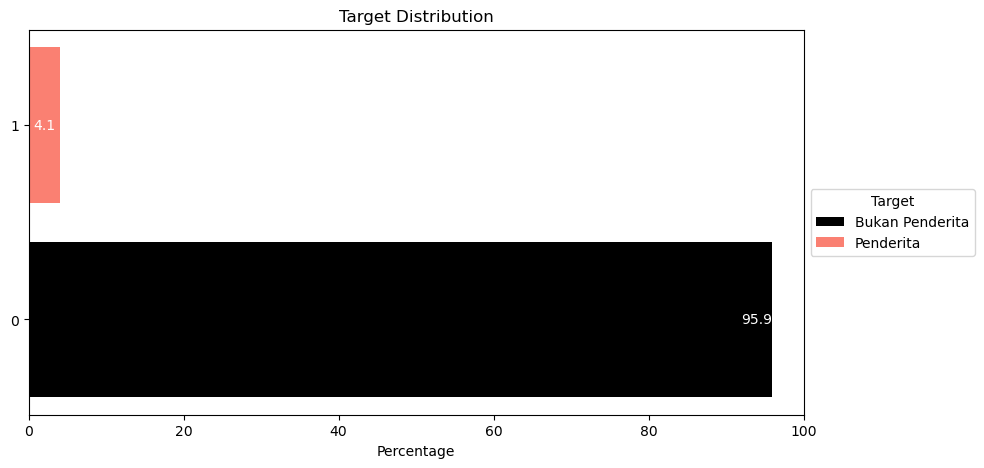

In [9]:
# Calculate the distribution
target_counts = df['CoronaryHeartDisease'].value_counts(normalize=True) * 100
categories = target_counts.index.map(str)
counts = target_counts.values
colors = ['black', 'salmon']

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(categories, counts, color=colors)

# Add the text on the bars
for bar in bars:
    width = bar.get_width()
    label_position = width - 2 if width > 1 else width + 2
    ax.text(label_position, bar.get_y() + bar.get_height()/2, f'{width:.1f}', 
            va='center', ha='center', color='white')

# Set labels
ax.set_xlabel('Percentage')
ax.set_title('Target Distribution')
ax.set_xlim(0, 100)

# Add legend
ax.legend(bars, ['Bukan Penderita', 'Penderita'], title='Target', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


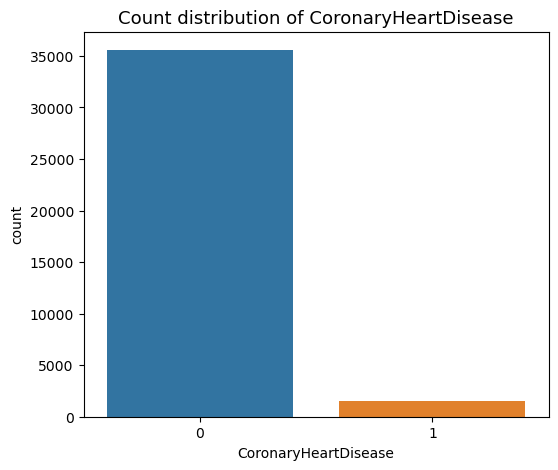

In [10]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(6, 5), facecolor='w')

sns.countplot(x="CoronaryHeartDisease", data=df)
plt.title("Count distribution of CoronaryHeartDisease", size=13)

plt.show()

## 4. Pre-Processing

### Data Cleaning

In [11]:
df.describe()

,Gender,Age,X60_sec_pulse,Systolic,Diastolic,Weight,Height,Body_Mass_Index,White_Blood_Cells,Lymphocyte,Monocyte,Eosinophils,Basophils,Red_Blood_Cells,Hemoglobin,Mean_Cell_Vol,Mean_Cell_Hgb_Conc.,Mean_cell_Hemoglobin,Platelet_count,Mean_Platelet_Vol,Segmented_Neutrophils,Hematocrit,Red_Cell_Distribution_Width,Albumin,ALP,AST,ALT,Cholesterol,Creatinine,Glucose,GGT,Iron,LDH,Phosphorus,Bilirubin,Protein,Uric_Acid,Triglycerides,Total_Cholesterol,LDL,HDL,Glycohemoglobin,Vigorous_work,Moderate_work,Diabetes,Blood_Rel_Diabetes,Blood_Rel_Stroke,CoronaryHeartDisease
count,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000
mean,1.513282,48.943661,72.579250,124.090078,69.919253,80.988276,167.389601,28.824588,7.269524,30.225459,7.915710,2.833415,0.700906,4.668632,14.139073,89.534540,30.365387,33.897452,253.012886,8.196637,58.372284,41.695175,13.082278,42.528116,70.789611,25.722511,25.601850,5.077399,78.632276,5.595013,29.459667,15.266181,132.045632,1.203049,11.801173,72.050158,321.723326,1.695405,5.081713,2.863667,1.370344,5.676496,1.783840,1.598856,1.907333,1.549502,1.796165,0.040670
std,0.499830,18.010440,12.242108,19.254741,13.575804,20.678734,10.122908,6.608982,2.478754,8.590412,2.324364,2.116698,0.474369,0.509368,1.541599,5.745514,2.336812,0.932481,67.403298,0.923022,9.581765,4.374323,1.304517,3.585254,26.073559,19.695625,25.889693,1.079629,39.157384,2.059786,43.576787,6.416872,31.961662,0.182223,5.276652,4.967992,86.129723,1.283654,1.072682,0.953910,0.415985,1.050223,0.448324,0.511199,0.349674,0.497550,0.402853,0.197527
min,1.000000,20.000000,32.000000,0.000000,0.000000,32.300000,129.700000,13.180000,1.400000,2.700000,0.600000,0.000000,0.000000,2.260000,5.800000,50.800000,14.600000,27.800000,4.000000,4.700000,0.800000,19.700000,9.700000,19.000000,7.000000,7.000000,4.000000,0.155000,17.700000,1.050000,3.000000,0.900000,4.000000,0.484000,0.000000,47.000000,23.800000,0.102000,1.530000,-10.826000,0.160000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,33.000000,64.000000,111.000000,62.000000,66.500000,160.000000,24.220000,5.700000,24.400000,6.400000,1.500000,0.400000,4.320000,13.100000,86.700000,29.300000,33.300000,208.000000,7.600000,52.400000,38.700000,12.300000,40.000000,55.000000,19.000000,16.000000,4.319000,61.880000,4.718000,14.000000,10.900000,113.000000,1.098000,8.550000,69.000000,261.700000,0.903000,4.320000,2.217500,1.070000,5.200000,2.000000,1.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,48.000000,72.000000,121.000000,70.000000,78.200000,167.100000,27.800000,6.900000,29.700000,7.700000,2.300000,0.600000,4.660000,14.100000,89.900000,30.600000,33.861696,246.000000,8.100000,58.800000,41.800000,12.800000,43.000000,67.000000,23.000000,21.000000,4.991000,73.370000,5.110000,20.000000,14.500000,128.000000,1.195000,10.260000,72.000000,315.200000,1.344000,5.020000,2.805000,1.290000,5.400000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
75%,2.000000,63.000000,80.000000,134.000000,78.000000,92.100000,174.600000,32.100000,8.400000,35.500000,9.100000,3.500000,0.900000,5.010000,15.200000,93.000000,31.700000,34.500000,290.000000,8.800000,64.800000,44.800000,13.500000,45.000000,82.000000,27.000000,28.000000,5.740000,88.400000,5.662000,31.000000,18.800000,146.000000,1.324000,13.680000,75.000000,374.700000,2.066000,5.740000,3.445250,1.600000,5.800000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
max,2.000000,85.000000,224.00000

### Handling Missing Values:

In [12]:
df.isnull().sum()

Gender                         0
Age                            0
X60_sec_pulse                  0
Systolic                       0
Diastolic                      0
Weight                         0
Height                         0
Body_Mass_Index                0
White_Blood_Cells              0
Lymphocyte                     0
Monocyte                       0
Eosinophils                    0
Basophils                      0
Red_Blood_Cells                0
Hemoglobin                     0
Mean_Cell_Vol                  0
Mean_Cell_Hgb_Conc.            0
Mean_cell_Hemoglobin           0
Platelet_count                 0
Mean_Platelet_Vol              0
Segmented_Neutrophils          0
Hematocrit                     0
Red_Cell_Distribution_Width    0
Albumin                        0
ALP                            0
AST                            0
ALT                            0
Cholesterol                    0
Creatinine                     0
Glucose                        0
GGT       

In [13]:
df.duplicated().sum()

0

### Outlier Detection and Removal:

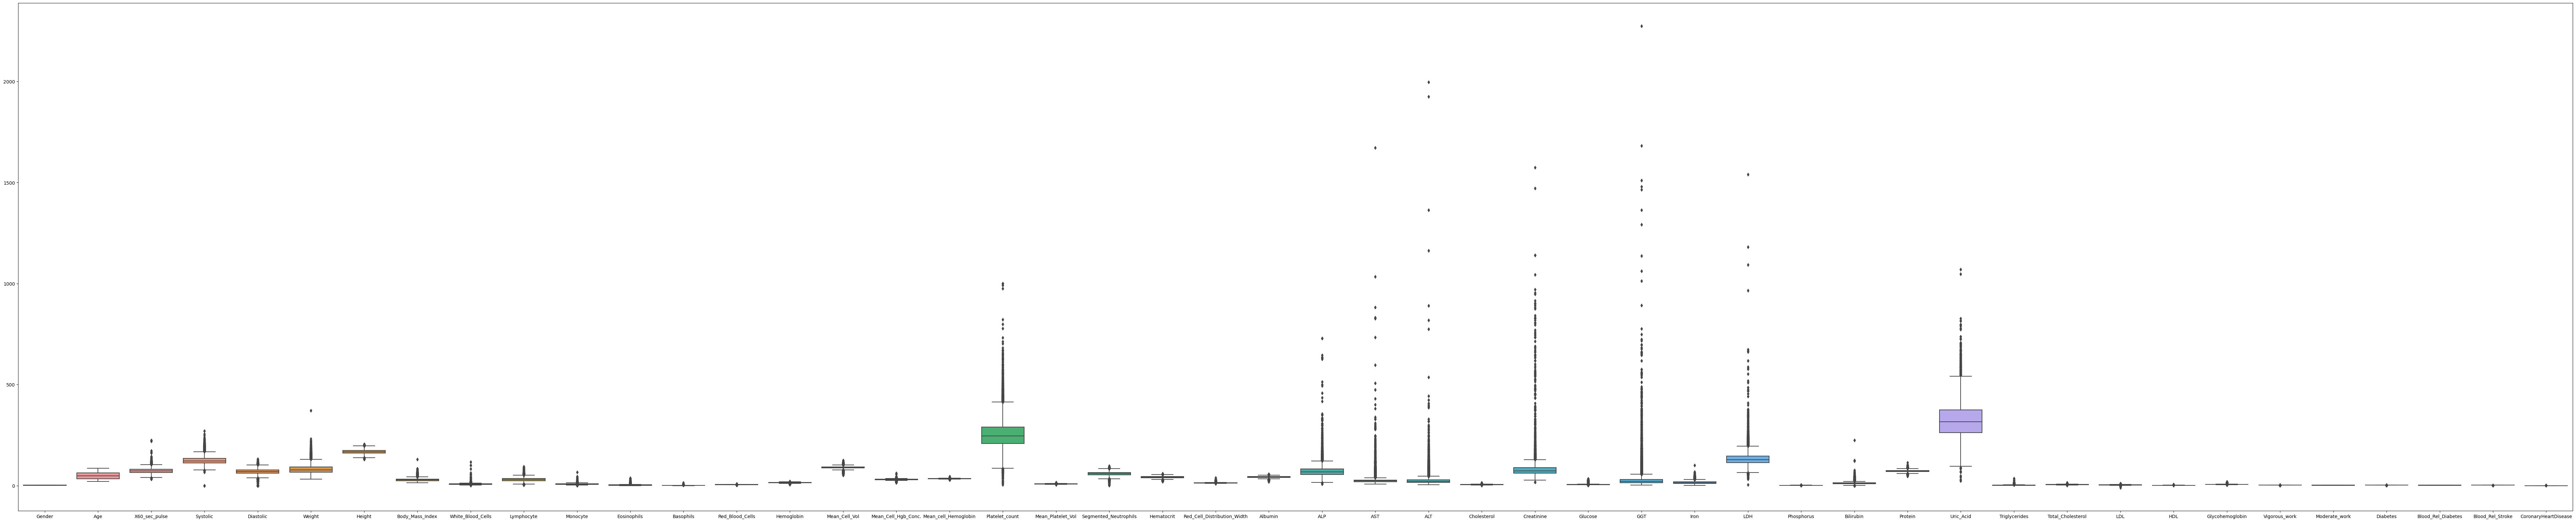

In [14]:
plt.figure(figsize=(100,20), facecolor='w')
sns.boxplot(data=df)
plt.show()

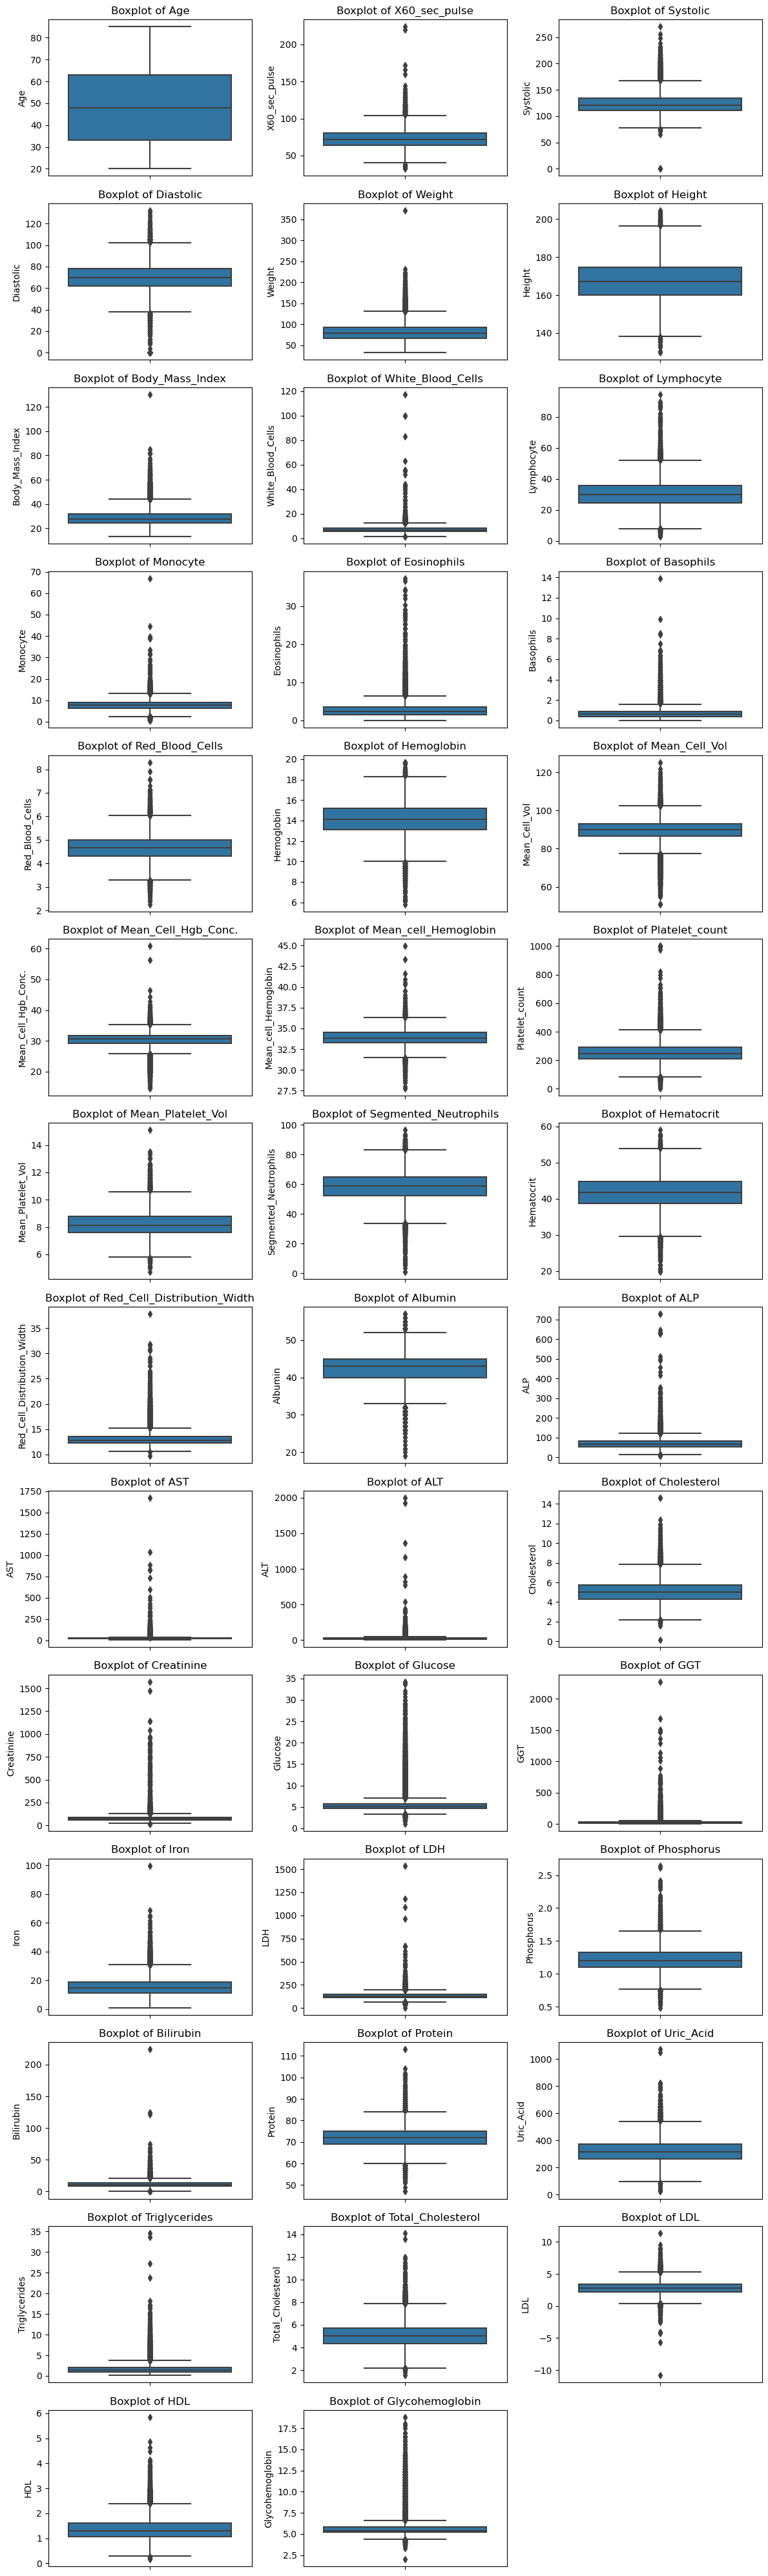

In [15]:
# List of variables to check for outliers
num_variables = [
    'Age', 'X60_sec_pulse', 'Systolic', 'Diastolic', 'Weight', 'Height', 
    'Body_Mass_Index', 'White_Blood_Cells', 'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red_Blood_Cells', 
    'Hemoglobin', 'Mean_Cell_Vol', 'Mean_Cell_Hgb_Conc.', 'Mean_cell_Hemoglobin', 'Platelet_count', 
    'Mean_Platelet_Vol', 'Segmented_Neutrophils','Hematocrit', 'Red_Cell_Distribution_Width', 'Albumin', 'ALP', 'AST', 
    'ALT', 'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 
    'Uric_Acid', 'Triglycerides', 'Total_Cholesterol', 'LDL', 'HDL', 'Glycohemoglobin'
]

# Function to detect and replace outliers using mean
def replace_outliers_with_mean(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        mean_value = df[column].mean()
        
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mean_value
    return df

# Visualize outliers using boxplot after replacing with mean
plt.figure(figsize=(12, 40)) 
for i, variable in enumerate(num_variables):
    plt.subplot(14, 3, i + 1)
    sns.boxplot(y=df[variable])
    plt.title(f'Boxplot of {variable}')
plt.tight_layout()
plt.show()



In [16]:
# Replace outliers with mean
df_clean = replace_outliers_with_mean(df, num_variables)

# Menampilkan data asli
print("Data Data Asli")
print(df)

# Menampilkan data setelah penghapusan outlier
print("\nData setelah penghapusan outlier:")
print(df_clean)

Data Data Asli
       Gender   Age  X60_sec_pulse    Systolic  Diastolic  Weight      Height  \
0           1  77.0           68.0   98.000000       56.0    75.4  174.000000   
1           1  49.0           66.0  122.000000       83.0    92.5  178.300000   
2           1  37.0           64.0  124.090078       99.0    99.2  180.000000   
3           1  70.0          102.0  130.000000       66.0    63.6  157.700000   
4           1  81.0           72.0  136.000000       61.0    75.5  166.200000   
...       ...   ...            ...         ...        ...     ...         ...   
37074       1  25.0           92.0  112.000000       76.0    39.2  167.389601   
37075       2  76.0           78.0  112.000000       46.0    59.1  165.800000   
37076       2  80.0           74.0  146.000000       58.0    71.7  152.200000   
37077       1  35.0           76.0  106.000000       66.0    78.2  173.300000   
37078       2  24.0           80.0  114.000000       68.0    58.3  165.000000   

       Body_

## Menghitung korelasi

In [17]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the target column for the correlation matrix
df_features = df.drop(columns='CoronaryHeartDisease')

# Compute the correlation matrix
correlation_matrix = df_features.corr()

# Set the correlation threshold
threshold = 0.7

# Identify features to drop based on the threshold
col_corr = set()  # Set of all the names of correlated columns
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # Absolute value of the correlation coefficient
            colname = correlation_matrix.columns[i]  # Getting the name of the column
            col_corr.add(colname)

# Print the identified features for review
print(f"Features identified for removal: {col_corr}")

# Remove the highly correlated features
df_reduced = df_features.drop(columns=col_corr)

print(f"Remaining features after correlation thresholding: {df_reduced.columns}")

# Optionally, add the target variable back to the reduced dataframe
df_reduced['CoronaryHeartDisease'] = df['CoronaryHeartDisease']

Features identified for removal: {'Mean_Cell_Hgb_Conc.', 'LDL', 'Total_Cholesterol', 'Segmented_Neutrophils', 'Hemoglobin', 'Hematocrit', 'Body_Mass_Index'}
Remaining features after correlation thresholding: Index(['Gender', 'Age', 'X60_sec_pulse', 'Systolic', 'Diastolic', 'Weight',
       'Height', 'White_Blood_Cells', 'Lymphocyte', 'Monocyte', 'Eosinophils',
       'Basophils', 'Red_Blood_Cells', 'Mean_Cell_Vol', 'Mean_cell_Hemoglobin',
       'Platelet_count', 'Mean_Platelet_Vol', 'Red_Cell_Distribution_Width',
       'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose',
       'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric_Acid',
       'Triglycerides', 'HDL', 'Glycohemoglobin', 'Vigorous_work',
       'Moderate_work', 'Diabetes', 'Blood_Rel_Diabetes', 'Blood_Rel_Stroke'],
      dtype='object')


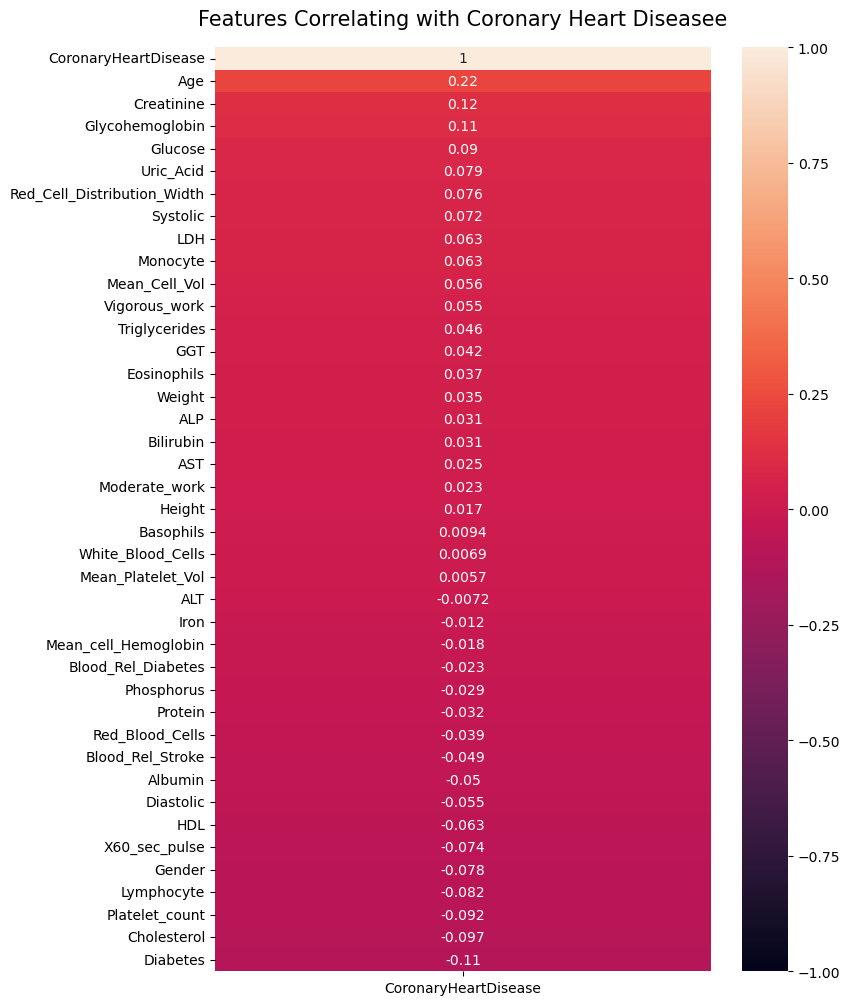

In [18]:
#  korelasi semua fitur dengan 'CoronaryHeartDisease', sebuah variabel dependen tunggal, yang diurutkan berdasarkan 'CoronaryHeartDisease' secara menurun.
df_reduced.corr()[['CoronaryHeartDisease']].sort_values(by='CoronaryHeartDisease', ascending=False)

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_reduced.corr()[['CoronaryHeartDisease']].sort_values(by='CoronaryHeartDisease', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Coronary Heart Diseasee', fontdict={'fontsize':15}, pad=16);

## Feature Splitting

In [19]:
X = df_reduced.drop(columns='CoronaryHeartDisease') #x atribut yang mempengaruhi CoronaryHeartDisease (independent variable)
y = df_reduced['CoronaryHeartDisease'] #y atribut label (dependent)

In [20]:
df_clean['CoronaryHeartDisease'].value_counts()

0    35571
1     1508
Name: CoronaryHeartDisease, dtype: int64

In [21]:
from imblearn.under_sampling import RandomUnderSampler
# Melakukan undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersample.fit_resample(X, y)
print(X_resampled.shape)
print(y_resampled.shape)

(3016, 40)
(3016,)


## Resampling imbalanced dataset by oversampling positive cases Using SMOTE

In [22]:
#SMOTE
from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import SMOTENC

# Resampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menampilkan hasil resampling
print("Sebelum resampling, distribusi kelas pada training set:")
print(pd.Series(y).value_counts())
print("\nSetelah resampling, distribusi kelas pada training set:")
print(pd.Series(y_resampled).value_counts())

Sebelum resampling, distribusi kelas pada training set:
0    35571
1     1508
Name: CoronaryHeartDisease, dtype: int64

Setelah resampling, distribusi kelas pada training set:
0    35571
1    35571
Name: CoronaryHeartDisease, dtype: int64


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    test_size = 0.2, 
                                                    stratify = y_resampled, #memastikan bahwa split antara train dan test memiliki proporsi kelas yang sama dengan set data asli.
                                                    random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56913, 40), (14229, 40), (56913,), (14229,))

In [24]:
y_train.value_counts()

1    28457
0    28456
Name: CoronaryHeartDisease, dtype: int64

## Training to get the hyperparameter

In [25]:
import logging
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV

from jcopml.tuning import grid_search_params as gsp
from jcopml.tuning import random_search_params as rsp
from jcopml.tuning import bayes_search_params as bsp

from jcopml.tuning.space import Integer, Real
from skopt.space import Categorical

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, space_eval
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Gradient Boosting

## Feature Selection

### 1. filter method - Information Gain

### 2. wrapper method - Recursive Feature Elimination 

### 3. embedded method - feature importance

### 4. Aggregate Scores

## Menghitung korelasi

In [26]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# Feature selection menggunakan SelectKBest
k = 10  # Memilih 10 fitur terbaik
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [27]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd

# Misalnya kita punya dataset X_resampled (fitur), y_resampled (target) dan X_test
# X_resampled, y_resampled = load_your_data()
# X_test = load_your_test_data()

# Feature selection menggunakan SelectKBest
k = 10  # Memilih 10 fitur terbaik
selector = SelectKBest(score_func=lambda X, y: mutual_info_classif(X, y, random_state=42), k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Mendapatkan skor dari semua fitur
scores = selector.scores_

# Mendapatkan indeks dari fitur yang terpilih
selected_features_indices = selector.get_support(indices=True)

# Mendapatkan skor dari fitur yang terpilih
selected_scores = scores[selected_features_indices]

# Membuat DataFrame untuk memudahkan interpretasi
feature_scores = pd.DataFrame({
    'Feature': X_resampled.columns[selected_features_indices],
    'Score': selected_scores
})

# Menampilkan skor fitur yang terpilih
print(feature_scores.sort_values(by='Score', ascending=False))

             Feature     Score
4    Red_Blood_Cells  0.571339
2           Monocyte  0.567898
1  White_Blood_Cells  0.567818
5      Mean_Cell_Vol  0.566834
0                Age  0.563981
7        Cholesterol  0.561632
8               Iron  0.561539
3        Eosinophils  0.559770
9      Triglycerides  0.559235
6                ALP  0.558934


## Data Scaling

## Training model with balanced class and feature selection applied 

In [ ]:
import time
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the hyperparameter space
space  = [
    Integer(3, 50, name='max_depth'),
    Real(0.01, 1, "log-uniform", name='learning_rate'),
    Integer(10, 80, name='n_estimators'),
    Real(0.01, 1, name='subsample'),
    Integer(2, 20, name='min_samples_split'),
    Integer(1, 20, name='min_samples_leaf')
]

# Define the objective function
@use_named_args(space)
def objective(**params):
    clf = GradientBoostingClassifier(random_state=42, **params)
    score = cross_val_score(clf, X_train_selected, y_train, cv=StratifiedKFold(n_splits=3), scoring='accuracy').mean()
    return -score

# Start timer
start_time = time.time()

# Perform Bayesian Optimization using Gaussian Process
res_gp = gp_minimize(objective, space, n_calls=50, random_state=42)

# Get the best parameters
best_params = {dim.name: val for dim, val in zip(space, res_gp.x)}
print("Best parameters: ", best_params)

# Train the final model with the best parameters
bclf = GradientBoostingClassifier(random_state=42, **best_params)
bclf.fit(X_train_selected, y_train)
best_score = cross_val_score(bclf, X_train_selected, y_train, cv=StratifiedKFold(n_splits=3), scoring='accuracy').mean()
print("Best Accuracy: ", best_score)

# Stop timer
end_time = time.time()

# Calculate computation time
computation_time = end_time - start_time
print('Waktu Komputasi: {:.2f} detik'.format(computation_time))

In [ ]:
#Extracting scores from each fold
cv_results = res_gp.cv_results_ # hasil cross-validation dari semua iterasi.
mean_test_scores = cv_results['mean_test_score'] # skor rata-rata untuk setiap iterasi.
std_test_scores = cv_results['std_test_score'] # standar deviasi untuk setiap iterasi.
params_list = cv_results['params'] # Menampilkan parameter yang digunakan untuk setiap iterasi. 

for i, (mean, std, params) in enumerate(zip(mean_test_scores, std_test_scores, params_list)):
    print(f"Iteration {i+1}")
    print(f"Mean Test Score: {mean:.4f}")
    print(f"Std Test Score: {std:.4f}")
    print(f"Params: {params}")
    print()

# If you want to see detailed scores of each fold
split_columns = [col for col in cv_results.keys() if col.startswith('split')]
for col in split_columns:
    print(f"{col}: {cv_results[col]}")

In [ ]:
# Inisialisasi Gradient Boosting Classifier dengan hyperparameter terbaik
gbc = GradientBoostingClassifier(random_state=42, **best_params)

# Fit the Gradient Boosting Classifier ke Training Set
gbc.fit(X_train_selected, y_train)

# Evaluasi pada Training Set
print(f"Training Accuracy: {gbc.score(X_train_selected, y_train)}")

# Making Predictions on the Testing Set
y_pred = gbc.predict(X_test_selected)

# Evaluating the Accuracy of the Gradient Boosting Classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy}")

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Mendapatkan probabilitas prediksi
y_prob = gbc.predict_proba(X_test_selected)[:, 1]

# Menghitung ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Menghitung AUC Score
auc_score = roc_auc_score(y_test, y_prob)

# Membuat plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **Model Evaluation**

In [ ]:
model_ev = pd.DataFrame(
    {'Model': ['Random Forest', 'Extreme Gradient Boosting'], 'Accuracy': [gb_acc_score*100, gb_acc_score*100]}
)
model_ev

In [ ]:
colors = ['salmon','Wheat']

plt.figure(figsize=(7,7), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()